In [5]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}
plt.rcParams['figure.dpi'] = 100

# Assignment 1 - PHYC90010

The following idealised model [B. Drossel and F. Schwabl, Physical Review Letters 69, 1629 (1992)] aims to describe the sporadic ignition and sometimes uncontrolled spread of forest  fires.  It  has  become  an  archetype  of  a  particular  class  of  self-organised  critical systems.  There  is  an  ongoing  debate  about  how  faithfully  it  captures  the  spread  of  real forest fires, but its utility as a toy model is undeniable.

To construct the model consider a two-dimensional square lattice with periodic boundary conditions.  Each  site  on  the  lattice  occupies  one  of  three  states  at  any  instant:  black (empty),  green  (unburnt  trees),  or  red  (burning  trees).  Initially,  it  contains  a  random mixture of empty and green sites. At each time step, the lattice is updated according to the following rules:

* A red site becomes black 
* A green site becomes red if one of its neighbours is red, otherwise it becomes red with probability $f$ 
* A black site becomes green with probability $p$


#### Question 1
- The first rule essentially means that since a site that is on fire, will, after some appropriate time step, have consumed all the fuel in the region, thereby moving from red to black.
- The second rule tells us that sites with trees will catch fire if they are nearby another site that is also on fire, but it will only catch fire in isolation based on some probability
- The third rule states that the sites which are empty will eventually regenerate

#### Question 2
The lighting of fires randomly acts as a driver for the system, whereby the system randomly samples the probability of a given cell igniting

#### Question 3
Included in mdezylva_assignment_1.py is the following code, which assigns black cells a value of 0, green cells a value of 1, and burning cells a value of 100. This allows us to take advantage of a 2D convolve method to calculate if any nearby cells are on fire. 
 
It then iterates over the array, and checks to see if the data contained in a given cell is red, green, or black. 

* If it is red, it converts it to black. 
* If is it green, it checks to see if there is a neighbor that was on fire in the previous step of the simulation. If there was, it converts the green cell to red. If there is no neighbour on fire, it calculates the probability of fire spontaneously occuring
* If the site is black, it calculates the probability of it randomly regenerating



#### Question 4

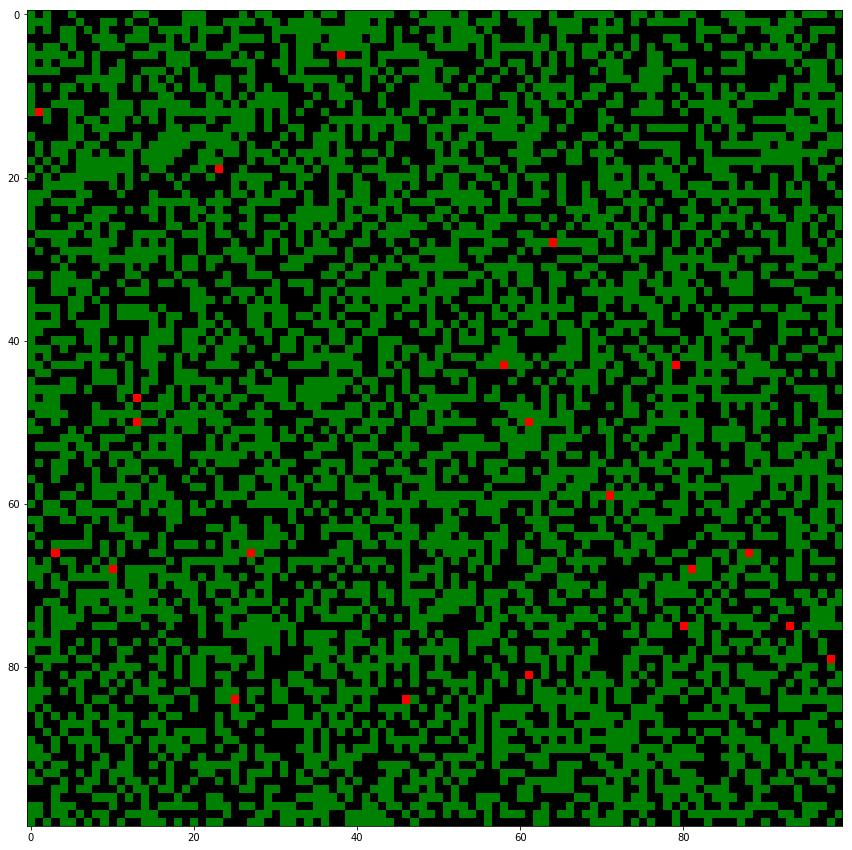

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
import scipy.signal


class fire_sim_world:
    def __init__(self, dim, f, p):
        self.data = np.random.randint(0, 2, dim)
        self.p = p
        self.f = f

    def __repr__(self):
        return f'World({self.data!r})\n with probabilities ({self.p!r},{self.f!r})'

    def calc_s(self, runtime):
        '''
        Simulates behaviour for a given runtime, and gives the S-value (total number of pixels on fire)
        '''
        number_on_fire = 0
        for i in range(runtime):
            self.simple_update()
        for i in range(len(self.data)):
            for j in range(len(self.data[i])):
                if self.data[i][j] > 99:
                    number_on_fire += 1

        return(number_on_fire)

    def simple_update(self):
        '''
        Utilises a simple method for updating the world based on conditions specified in question
        '''

        'Convolution creates a check matrix, with Periodic Boundary Conditions which we can check for behaviour '
        check = sp.signal.convolve2d(self.data, np.array(
            [[0., 1., 0.], [1., 0., 1.], [0., 1., 0.]]), mode='same', boundary='wrap')

        for i in range(len(self.data)):
            for j in range(len(self.data[i])):

                'Behaviour for Red Cells'
                if self.data[i][j] > 99:
                    self.data[i][j] = 0

                'Behaviour for Green Cells'
                if self.data[i][j] == 1:
                    if check[i][j] > 5:
                        self.data[i][j] = 100
                    if rand.random() < self.f:
                        self.data[i][j] = 100

                'Behaviour for Black Cells'
                if self.data[i][j] == 0:
                    if rand.random() < self.p:
                        self.data[i][j] = 1


def complex_update(self):
    '''
    Utilises a simple method for updating the world based on conditions specified in question
    '''

    'Convolution creates a check matrix, with Periodic Boundary Conditions which we can check for behaviour '
    check = sp.signal.convolve2d(self.data, np.array(
        [[0., 1., 0.], [1., 0., 1.], [0., 1., 0.]]), mode='same', boundary='wrap')

    for i in range(len(self.data)):
        for j in range(len(self.data[i])):

            'Behaviour for Red Cells'
            if self.data[i][j] > 99:
                self.data[i][j] = 0

            'Behaviour for Green Cells'
            if self.data[i][j] == 1:
                if check[i][j] > 5:
                    self.data[i][j] = 100
                if rand.random() < self.f:
                    self.data[i][j] = 100

            'Behaviour for Black Cells'
            if self.data[i][j] == 0:
                if check[i][j] < 5 and check[i][j] > 0:
                    if rand.random() < (self.p - 0.2):
                        self.data[i][j] = 1
                if rand.random() < self.p:
                    self.data[i][j] = 1


def animate(i):
    sim.simple_update()
    ax.imshow(sim.data, interpolation='nearest', cmap=cmap, norm=norm)


def generate_pdf(sim, sim_runs):
    s_values = np.ndarray(sim_runs)
    for i in range(sim_runs):
        s_values[i]= sim.generate_pdf(sim_runs)
    return(s_values)

def calc_wait_time(sim):
    index_1 = np.random.randint(0,len(sim.data))
    index_2 = np.random.randint(0,len(sim.data[0]))
    count = 0
    while sim.data[index_1][index_2] < 99:
        count += 1
        sim.simple_update()
    return(count)

if __name__ == '__main__':
    f_prob = float(
        input("Enter probability of a Green Site catching fire (f) : "))
    p_prob = float(
        input("Enter probability of a black site regenerating (p) : "))
    size = int(input("Enter dimension (NxN) of simulation: "))

    sim = fire_sim_world([size, size], f_prob, p_prob)

    cmap = colors.ListedColormap(['black', 'green', 'red'])
    bounds = [0, 0.8, 5, 105]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    speed = 100

    fig, ax = plt.subplots(figsize=(15, 15))
    ani = animation.FuncAnimation(fig, animate,
                                  frames=100, interval=speed,
                                  save_count=50)
    plt.draw()
    plt.show()


#### Question 5 
Included are some calculations for the cases
* $f = 0$, $p = 0.5$ 
* $f = 0.0001$ , $p = 0.005$
* $f = 0.005$ , $p = 0.0001$



#### Question 6
* What we see is that for the first case, over a long enough period of time, the fire will burn the entire forest away, and since there is no regeneration, it will be a simulation filled with entirely black sites
* For the second case, we see a reasonably broad spread of values for $s$, centred at about 300 sites. This suggests that the probability of regeneration is high enough that there will be a fire burning in approximately $3\%$ of the cells. This suggests that there is a level of self-criticality to the system, whereby it will always be regrowing enough that a fire can always start
* For the last case, the pdf seems to be very centred on 0, with only a few cells ever exhibiting a fire after a reasonably long period. This is likely due to the fact that the probability of ignition is comparatively low when compared to the regeneration probability, and so the fires burn through the forest very quickly before dying out


#### Question 7 

#### Question 8

Since the differential equations are reliant on a sort of 'inflow' and 'outflow' it is relatively easy to derive them by considering the rates of both. In the case of $x_g$, we see that:
* The inflow is proportional to $ (1 - x_g - x_r )  $, since this number represents the number of black cells, and it's proportionality constant will be given by $p$ 
* The outflow is proportional to the sum of the $f x_g$ since a green cell has $f$ probability of turning red, and $4 x_g x_r$, since this number represents the probability that a green cell and a red cell will be next to each other directly (the factor of 4 accounting for the 4 possible adjacencies) 

Therefore, the differential equation describing $x_g$ is given by 
$$ \frac{d x_g}{dt} &= - f x_g - 4 x_g x_r + p(1 - x_g - x_r)$$

Similarly, the differential equation describing $x_r$ will have the same terms that were considered outflow for $x_g$ as inflow, and will lose $x_r$ cells per time-step. 

Therefore the differential equation for $x_r$ will be given by 
$$ \frac{d x_r}{dt} &= - x_r + f x_g + 4 x_g x_r $$  

#### Question 9 

#### Question 10 
Three possible ways to make this model more realistic are
* Add in some probability of fire jumping a number of steps away, or operating on cells that are diagonally adjacent
* Increasing the chance of regeneration if a given cell is next to one that is already green
* Not making neighbor cells cause immediate ignition, since it takes time for a cell to catch fire